In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv('V:/data.csv')
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108045,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [2]:
df.shape

(2227, 3)

In [3]:
df.isnull().values.any()

True

In [5]:
df['x1'].isnull().sum()

5

In [6]:
df['x2'].isnull().sum()

3

In [7]:
df['y'].isnull().sum()

0

In [8]:
df.isnull().sum().sum()


8

In [9]:
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
df

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108045,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2214,98.714112,8.964312e+01,0
2215,96.633331,9.100000e+01,0
2216,85.673940,1.038393e+02,0
2217,78.958862,7.860537e+01,0


In [15]:
x = df.iloc[:,[0,1]].values
x

array([[-1.19366669e+02,  1.15000000e+02],
       [-1.01108045e+02,  9.77771586e+01],
       [-1.30278658e+02,  1.06767654e+02],
       ...,
       [ 8.56739404e+01,  1.03839270e+02],
       [ 7.89588622e+01,  7.86053707e+01],
       [ 1.09624009e+02,  9.99999990e+07]])

In [16]:
x.shape

(2219, 2)

In [17]:
y = df.iloc[:,[2]].values
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

<AxesSubplot:xlabel='y', ylabel='count'>

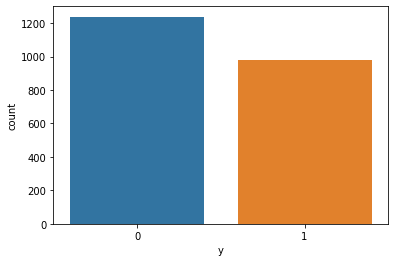

In [42]:
sns.countplot(x='y',data=df)

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[-0.96907039 -0.02450142]
 [ 0.80189211 -0.02449195]
 [-1.30360146 -0.02447238]
 [ 1.32819222 -0.02449858]
 [ 0.69358156 -0.02450338]
 [ 0.45374139 -0.02450629]
 [-0.16358858 -0.02453908]
 [-0.86338268 -0.0245703 ]
 [-1.12642505 -0.0245594 ]
 [ 1.13266211 -0.02448934]]


In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

c:\users\user\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(xtest)

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[265  43]
 [177  70]]


In [23]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.6036036036036037


Text(0.5, 257.44, 'Predicted label')

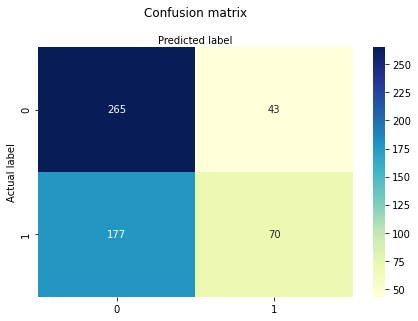

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))

Accuracy: 0.6036036036036037
Precision: 0.6194690265486725
Recall: 0.2834008097165992


In [39]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(xtrain,ytrain)
predictions = logmodel.predict(xtest)

c:\users\user\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71       308
           1       0.62      0.28      0.39       247

    accuracy                           0.60       555
   macro avg       0.61      0.57      0.55       555
weighted avg       0.61      0.60      0.57       555

